In [1]:
import ROOT

In [2]:
dir = '/eos/user/b/bbapi/My_Analysis/NTuples_bbgg/dr_ele_pho/root/WHM60-RunIISummer20UL18NanoAODv2/ws_WHM60Y2018/output_WHM60Y2018_M60_13TeV_amcatnlo_pythia8_WHM60Y2018.root'

In [3]:
f = ROOT.TFile.Open(dir)

TLS: Unable to create TLS context; invalid certificate.
TLS: 4056115B547F0000:error:0A00018F:SSL routines:SSL_CTX_use_certificate:ee key too small:ssl/ssl_rsa.c:251:

Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3010] Unable to give access - user access restricted - unauthorized identity used ; Permission denied



In [4]:
f.ls()

TFile**		/eos/user/b/bbapi/My_Analysis/NTuples_bbgg/dr_ele_pho/root/WHM60-RunIISummer20UL18NanoAODv2/ws_WHM60Y2018/output_WHM60Y2018_M60_13TeV_amcatnlo_pythia8_WHM60Y2018.root	
 TFile*		/eos/user/b/bbapi/My_Analysis/NTuples_bbgg/dr_ele_pho/root/WHM60-RunIISummer20UL18NanoAODv2/ws_WHM60Y2018/output_WHM60Y2018_M60_13TeV_amcatnlo_pythia8_WHM60Y2018.root	
  KEY: TDirectoryFile	tagsDumper;1	tagsDumper
  KEY: TProcessID	ProcessID0;1	dee428ca-eb84-11f0-bfcc-bbc3b8bcbeef


In [5]:
w = f.Get("tagsDumper")
w.ls()

TDirectoryFile*		tagsDumper	tagsDumper
 KEY: RooWorkspace	cms_hgg_13TeV;1	cms_hgg_13TeV


In [6]:
ws = w.Get("cms_hgg_13TeV")

In [7]:
ws.Print('v')


RooWorkspace(cms_hgg_13TeV) cms_hgg_13TeV contents

variables
---------
(CMS_hgg_mass,dZ,intLumi,weight,weight_central,weight_nominal)

datasets
--------
RooDataSet::WHM60Y2018_60_13TeV_DiPho_pt(CMS_hgg_mass,dZ,weight_central,weight_nominal)



In [8]:
dataset = ws.data("WHM60Y2018_60_13TeV_DiPho_pt")

In [9]:
variable = ws.var("weight")

In [10]:
row2 = variable.getVal()

In [11]:
row2

1.0121457489878542e-06

In [9]:
print(dataset)

Name: WHM60Y2018_60_13TeV_DiPho_pt Title: WHM60Y2018_60_13TeV_DiPho_pt


In [13]:
dataset.weight()
Row = dataset.get(1000)
print(Row.getRealValue("CMS_hgg_mass"))
print(Row.getRealValue("weight_nominal"))

59.54155349731445
1.0


In [10]:
dataset.get(200)
dataset.weight()

1.0121457489878542e-06

In [11]:
dataset.numEntries()

15693

In [12]:
dataset.Print("v")

DataStore WHM60Y2018_60_13TeV_DiPho_pt (WHM60Y2018_60_13TeV_DiPho_pt)
  Contains 15693 entries
  Observables: 
    1)    CMS_hgg_mass = 61.305  L(10 - 70) B(150)  "CMS_hgg_mass"
    2)              dZ = 0.000259399  L(-20 - 20) B(40)  "dZ"
    3)  weight_central = 1  L(-999999 - 999999) B(1)  "weight_central"
    4)  weight_nominal = 1  L(-999999 - 999999) B(1)  "weight_nominal"
  Dataset variable "weight" is interpreted as the event weight


[#1] INFO:InputArguments -- RooAbsData::plotOn(WHM60Y2018_60_13TeV_DiPho_pt) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors


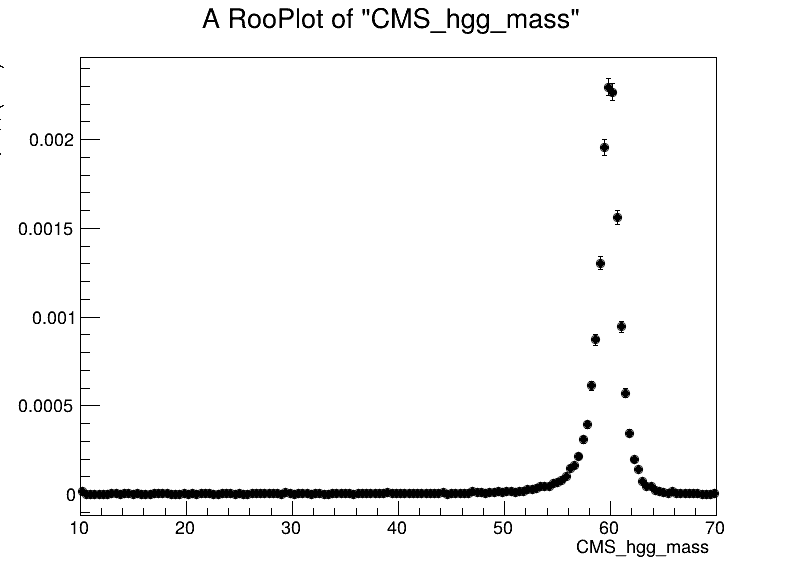

In [13]:
mass = ws.var("CMS_hgg_mass")

frame = mass.frame()
dataset.plotOn(frame)
# dataset.plotOn(frame, ROOT.RooFit.DataError(ROOT.RooAbsData.Poisson))

c = ROOT.TCanvas("c","c",800,600)
frame.Draw()
c.Draw()

In [18]:
# Get last plotted object as RooHist
idx = int(frame.numItems() - 1)
hist = ROOT.RooHist(frame.getObject(idx))

x_vals, y_vals = [], []
yerr_low, yerr_high = [], []

n = hist.GetN()

from array import array

x_buf = array('d', [0.0])
y_buf = array('d', [0.0])

x_vals, y_vals = [], []
yerr_low, yerr_high = [], []

for i in range(n):
    hist.GetPoint(i, x_buf, y_buf)

    x_vals.append(x_buf[0])
    y_vals.append(y_buf[0])

    yerr_low.append(hist.GetErrorYlow(i))
    yerr_high.append(hist.GetErrorYhigh(i))


In [19]:
print(n)

160


In [20]:
print(idx)

0


In [21]:
len(x_vals)

160

In [22]:
len(yerr_low)

160

In [23]:
yerr_low

[2.224419127108894e-05,
 2.4792406303473463e-06,
 2.263226697874281e-06,
 1.753087861911819e-06,
 2.263226697874281e-06,
 2.4792406303473463e-06,
 2.263226697874281e-06,
 1.753087861911819e-06,
 2.0242914979757085e-06,
 1.753087861911819e-06,
 2.8627804906337955e-06,
 2.8627804906337955e-06,
 1.753087861911819e-06,
 1.753087861911819e-06,
 2.8627804906337955e-06,
 2.4792406303473463e-06,
 2.8627804906337955e-06,
 2.4792406303473463e-06,
 3.356907682545952e-06,
 2.4792406303473463e-06,
 2.6778859423730675e-06,
 3.356907682545952e-06,
 3.200685890858684e-06,
 3.0364372469635627e-06,
 3.506175723823638e-06,
 3.7871026181922478e-06,
 4.173183831596822e-06,
 3.649343396218612e-06,
 3.0364372469635627e-06,
 4.048582995951417e-06,
 3.7871026181922478e-06,
 3.649343396218612e-06,
 2.4792406303473463e-06,
 3.649343396218612e-06,
 4.6382345090646155e-06,
 3.920023629764592e-06,
 4.294170735950693e-06,
 4.958481260694692e-06,
 3.356907682545952e-06,
 4.6382345090646155e-06,
 4.411841035972342e-06

In [24]:
yerr_high

[2.224419127108894e-05,
 2.4792406303473463e-06,
 2.263226697874281e-06,
 1.753087861911819e-06,
 2.263226697874281e-06,
 2.4792406303473463e-06,
 2.263226697874281e-06,
 1.753087861911819e-06,
 2.0242914979757085e-06,
 1.753087861911819e-06,
 2.8627804906337955e-06,
 2.8627804906337955e-06,
 1.753087861911819e-06,
 1.753087861911819e-06,
 2.8627804906337955e-06,
 2.4792406303473463e-06,
 2.8627804906337955e-06,
 2.4792406303473463e-06,
 3.356907682545952e-06,
 2.4792406303473463e-06,
 2.6778859423730675e-06,
 3.356907682545952e-06,
 3.200685890858684e-06,
 3.0364372469635627e-06,
 3.506175723823638e-06,
 3.7871026181922478e-06,
 4.173183831596822e-06,
 3.649343396218612e-06,
 3.0364372469635627e-06,
 4.048582995951417e-06,
 3.7871026181922478e-06,
 3.649343396218612e-06,
 2.4792406303473463e-06,
 3.649343396218612e-06,
 4.6382345090646155e-06,
 3.920023629764592e-06,
 4.294170735950693e-06,
 4.958481260694692e-06,
 3.356907682545952e-06,
 4.6382345090646155e-06,
 4.411841035972342e-06

In [25]:
import math
from array import array

nbins = hist.GetN()   # same bins as the RooHist

sumw  = [0.0] * nbins
sumw2 = [0.0] * nbins
counts = [0] * nbins

# get bin edges from the plotted RooHist
x = array('d',[0]); y = array('d',[0])

bin_edges = []

for i in range(nbins):
    hist.GetPoint(i, x, y)
    x0 = x[0]
    lo = x0 - hist.GetErrorXlow(i)
    hi = x0 + hist.GetErrorXhigh(i)
    bin_edges.append((lo, hi))

for j in range(dataset.numEntries()):
    # dataset.get(j)
    row = dataset.get(j)

    # xval = mass.getVal()
    xval = row.getRealValue(mass.GetName())
    print(xval)
    w = dataset.weight()   # event weight

    for i,(lo,hi) in enumerate(bin_edges):
        if lo <= xval < hi:
            counts[i] += 1
            sumw[i]  += w
            sumw2[i] += w*w
            break


59.294368743896484
59.90446853637695
58.246822357177734
59.73360824584961
59.421592712402344
70.0
60.5137825012207
63.677513122558594
57.00764083862305
57.74898147583008
56.98863220214844
60.24724578857422
58.245262145996094
60.118099212646484
60.12971878051758
60.099853515625
60.75501251220703
58.638607025146484
60.5675163269043
57.361629486083984
53.45237350463867
60.10467529296875
56.68696212768555
58.76533126831055
59.793067932128906
60.87397384643555
61.06928253173828
59.96480941772461
59.4870491027832
60.31558609008789
57.51660919189453
58.24298095703125
59.965110778808594
60.84133529663086
58.67694854736328
61.12639617919922
58.34442901611328
60.50788879394531
57.9702262878418
59.5081901550293
61.400150299072266
60.76700973510742
60.6436767578125
58.660072326660156
59.940673828125
58.91691970825195
61.80191421508789
54.50341033935547
50.691261291503906
57.23232650756836
58.933753967285156
55.44673538208008
59.356346130371094
57.78524398803711
63.715187072753906
59.05089569091797

58.38364028930664
59.547183990478516
60.4029426574707
59.69949722290039
59.611324310302734
60.14926528930664
60.585941314697266
60.39439392089844
60.56327438354492
61.79134750366211
58.86347198486328
60.723758697509766
58.57854080200195
58.56871032714844
59.41027069091797
58.622413635253906
60.69062042236328
56.628814697265625
60.222896575927734
61.951839447021484
57.4653434753418
61.003456115722656
59.76490020751953
58.944026947021484
58.97893524169922
50.0
50.0
60.05833435058594
70.0
59.28404235839844
59.84373092651367
60.59229278564453
58.65424346923828
51.144474029541016
58.01017761230469
60.56187057495117
57.152347564697266
59.902591705322266
59.801551818847656
61.2370491027832
57.399742126464844
60.05173110961914
60.338951110839844
59.634281158447266
58.34053039550781
59.06396484375
59.34683609008789
58.35581970214844
58.105892181396484
57.10141372680664
59.18217468261719
60.88504409790039
59.32474136352539
58.20079040527344
57.50285339355469
60.228633880615234
60.28014373779297


In [26]:
bin_edges

[(50.0, 50.125),
 (50.125, 50.25),
 (50.25, 50.375),
 (50.375, 50.5),
 (50.5, 50.625),
 (50.625, 50.75),
 (50.75, 50.875),
 (50.875, 51.0),
 (51.0, 51.125),
 (51.125, 51.25),
 (51.25, 51.375),
 (51.375, 51.5),
 (51.5, 51.625),
 (51.625, 51.75),
 (51.75, 51.875),
 (51.875, 52.0),
 (52.0, 52.125),
 (52.125, 52.25),
 (52.25, 52.375),
 (52.375, 52.5),
 (52.5, 52.625),
 (52.625, 52.75),
 (52.75, 52.875),
 (52.875, 53.0),
 (53.0, 53.125),
 (53.125, 53.25),
 (53.25, 53.375),
 (53.375, 53.5),
 (53.5, 53.625),
 (53.625, 53.75),
 (53.75, 53.875),
 (53.875, 54.0),
 (54.0, 54.125),
 (54.125, 54.25),
 (54.25, 54.375),
 (54.375, 54.5),
 (54.5, 54.625),
 (54.625, 54.75),
 (54.75, 54.875),
 (54.875, 55.0),
 (55.0, 55.125),
 (55.125, 55.25),
 (55.25, 55.375),
 (55.375, 55.5),
 (55.5, 55.625),
 (55.625, 55.75),
 (55.75, 55.875),
 (55.875, 56.0),
 (56.0, 56.125),
 (56.125, 56.25),
 (56.25, 56.375),
 (56.375, 56.5),
 (56.5, 56.625),
 (56.625, 56.75),
 (56.75, 56.875),
 (56.875, 57.0),
 (57.0, 57.125),
 (5

In [27]:
print(nbins)

160


In [28]:
bin_content = sumw                   # matches RooHist y
bin_error   = [math.sqrt(s2) for s2 in sumw2]   # SumW2 σ
nevents     = counts                 # raw number of entries
for i in range(nbins):
    print(f"Bin {i}: Content = {bin_content[i]}, Error = {bin_error[i]}, Entries = {nevents[i]}")

Bin 0: Content = 0.0004888663967611333, Error = 2.224419127108897e-05, Entries = 483
Bin 1: Content = 6.0728744939271254e-06, Error = 2.4792406303473463e-06, Entries = 6
Bin 2: Content = 5.060728744939271e-06, Error = 2.263226697874281e-06, Entries = 5
Bin 3: Content = 3.0364372469635627e-06, Error = 1.753087861911819e-06, Entries = 3
Bin 4: Content = 5.060728744939271e-06, Error = 2.263226697874281e-06, Entries = 5
Bin 5: Content = 6.0728744939271254e-06, Error = 2.4792406303473463e-06, Entries = 6
Bin 6: Content = 5.060728744939271e-06, Error = 2.263226697874281e-06, Entries = 5
Bin 7: Content = 3.0364372469635627e-06, Error = 1.753087861911819e-06, Entries = 3
Bin 8: Content = 4.048582995951417e-06, Error = 2.0242914979757085e-06, Entries = 4
Bin 9: Content = 3.0364372469635627e-06, Error = 1.753087861911819e-06, Entries = 3
Bin 10: Content = 8.097165991902834e-06, Error = 2.8627804906337955e-06, Entries = 8
Bin 11: Content = 8.097165991902834e-06, Error = 2.8627804906337955e-06, En

In [29]:
bin_content

[0.0004888663967611333,
 6.0728744939271254e-06,
 5.060728744939271e-06,
 3.0364372469635627e-06,
 5.060728744939271e-06,
 6.0728744939271254e-06,
 5.060728744939271e-06,
 3.0364372469635627e-06,
 4.048582995951417e-06,
 3.0364372469635627e-06,
 8.097165991902834e-06,
 8.097165991902834e-06,
 3.0364372469635627e-06,
 3.0364372469635627e-06,
 8.097165991902834e-06,
 6.0728744939271254e-06,
 8.097165991902834e-06,
 6.0728744939271254e-06,
 1.1133603238866394e-05,
 6.0728744939271254e-06,
 7.08502024291498e-06,
 1.1133603238866394e-05,
 1.012145748987854e-05,
 9.109311740890687e-06,
 1.2145748987854248e-05,
 1.4170040485829954e-05,
 1.7206477732793514e-05,
 1.3157894736842101e-05,
 9.109311740890687e-06,
 1.619433198380566e-05,
 1.4170040485829954e-05,
 1.3157894736842101e-05,
 6.0728744939271254e-06,
 1.3157894736842101e-05,
 2.1255060728744928e-05,
 1.5182186234817808e-05,
 1.8218623481781368e-05,
 2.4291497975708488e-05,
 1.1133603238866394e-05,
 2.1255060728744928e-05,
 1.923076923076

In [30]:
import numpy as np
np.sum(bin_content)

0.015658906882591084

In [31]:
np.sum(bin_error)

0.0010866221162582788

In [32]:
dataset.numEntries()

15693

In [33]:
dataset.sumEntries()

0.015883603238866395

In [76]:
dataset.get(20)
dataset.weight()

1.0121457489878542e-06

In [34]:
dataset.isWeighted()

True

In [35]:
row = dataset.get(2)
dz = row.getRealValue("dZ")
print(dz)

-0.0008544921875


In [36]:
for i in range(5):
    row = dataset.get(i)
    print(
        i,
        row.getRealValue("CMS_hgg_mass"),
        row.getRealValue("dZ"),
        dataset.weight(),
        dataset.SumW2,
        dataset.weightError()
    )


0 59.294368743896484 0.00046539306640625 1.0121457489878542e-06 1 0.0
1 59.90446853637695 -0.0032958984375 1.0121457489878542e-06 1 0.0
2 58.246822357177734 -0.0008544921875 1.0121457489878542e-06 1 0.0
3 59.73360824584961 -0.00177001953125 1.0121457489878542e-06 1 0.0
4 59.421592712402344 -0.000152587890625 1.0121457489878542e-06 1 0.0


In [37]:
dataset.SumW2

(RooAbsData::ErrorType::SumW2) : (unsigned int) 1

In [10]:
dc = dataset.emptyClone()

In [12]:
dc

In [11]:
dataset.numEntries()

15693

In [12]:
from collections import OrderedDict as od
DataHists = od()

weight = ROOT.RooRealVar("weight","weight",-10000,10000)
xvar   = mass
# xvar.setBins(15)
sumw = dataset.sumEntries()
for i in range(0,dataset.numEntries()):
    print(dataset.weight())
    xvar.setVal(dataset.get(i).getRealValue(xvar.GetName()))
    weight.setVal((1/sumw)*dataset.weight())
    print("weight: ", weight.getVal())
    dc.add(ROOT.RooArgSet(xvar,weight),weight.getVal())
    # Convert to RooDataHist
    DataHists = ROOT.RooDataHist("%s_hist"%dataset.GetName(),"%s_hist"%dataset.GetName(),ROOT.RooArgSet(xvar),dc)

1.0121457489878542e-06
weight:  6.372267890142103e-05
1.0121457489878542e-06
weight:  6.372267890142103e-05
1.0121457489878542e-06
weight:  6.372267890142103e-05
1.0121457489878542e-06
weight:  6.372267890142103e-05
1.0121457489878542e-06
weight:  6.372267890142103e-05
1.0121457489878542e-06
weight:  6.372267890142103e-05
1.0121457489878542e-06
weight:  6.372267890142103e-05
1.0121457489878542e-06
weight:  6.372267890142103e-05
1.0121457489878542e-06
weight:  6.372267890142103e-05
1.0121457489878542e-06
weight:  6.372267890142103e-05
1.0121457489878542e-06
weight:  6.372267890142103e-05
1.0121457489878542e-06
weight:  6.372267890142103e-05
1.0121457489878542e-06
weight:  6.372267890142103e-05
1.0121457489878542e-06
weight:  6.372267890142103e-05
1.0121457489878542e-06
weight:  6.372267890142103e-05
1.0121457489878542e-06
weight:  6.372267890142103e-05
1.0121457489878542e-06
weight:  6.372267890142103e-05
1.0121457489878542e-06
weight:  6.372267890142103e-05
1.0121457489878542e-06
weigh

In [70]:
print(sumw)

0.015883603238866395


In [13]:
DataHists.Print("v")

DataStore WHM60Y2018_60_13TeV_DiPho_pt_hist (WHM60Y2018_60_13TeV_DiPho_pt_hist)
  Contains 160 entries
  Observables: 
    1)  CMS_hgg_mass = 69.9375  L(50 - 70) B(160)  "CMS_hgg_mass"
Binned Dataset WHM60Y2018_60_13TeV_DiPho_pt_hist (WHM60Y2018_60_13TeV_DiPho_pt_hist)
  Contains 160 bins with a total weight of 1
  Observables:     1)  CMS_hgg_mass = 69.9375  L(50 - 70) B(160)  "CMS_hgg_mass"


In [16]:
DataHists.sumEntries()

1.0000000000000013

In [100]:
import ctypes
eLo, eHi = ctypes.c_double(), ctypes.c_double()
#eLo, eHi = ROOT.Double(), ROOT.Double()
DataHists.get(170)
print(DataHists.weight())
print(DataHists.numEntries())
DataHists.weightError(eLo,eHi,ROOT.RooAbsData.SumW2)

0.001019562862422736
200


In [105]:
import math
eLo = ctypes.c_double()
eHi = ctypes.c_double()

for i in range(DataHists.numEntries()):

    # access bin
    DataHists.get(i)

    # bin content (sum of weights)
    y = DataHists.weight()

    # retrieve SumW2 error
    DataHists.weightError(eLo, eHi, ROOT.RooAbsData.SumW2)

    print(f"bin {i}",
          " sumW =", y,
          " err =", eLo, eHi)


bin 0  sumW = 0.2462244312750985  err = c_double(0.003961070609296086) c_double(0.003961070609296086)
bin 1  sumW = 0.0015293442936341038  err = c_double(0.0003121760967033937) c_double(0.0003121760967033937)
bin 2  sumW = 0.0025489071560568415  err = c_double(0.00040301760787209324) c_double(0.00040301760787209324)
bin 3  sumW = 0.002039125724845472  err = c_double(0.000360469906932542) c_double(0.000360469906932542)
bin 4  sumW = 0.001019562862422736  err = c_double(0.0002548907156056841) c_double(0.0002548907156056841)
bin 5  sumW = 0.0025489071560568415  err = c_double(0.00040301760787209324) c_double(0.00040301760787209324)
bin 6  sumW = 0.003058688587268211  err = c_double(0.00044148366980663404) c_double(0.00044148366980663404)
bin 7  sumW = 0.0015293442936341038  err = c_double(0.0003121760967033937) c_double(0.0003121760967033937)
bin 8  sumW = 0.001019562862422736  err = c_double(0.0002548907156056841) c_double(0.0002548907156056841)
bin 9  sumW = 0.0015293442936341038  err =

In [14]:
import math, ctypes

binIdx = 30

# Move RooDataHist cursor to this bin
DataHists.get(binIdx)

# Use SAME binning as RooDataHist
binning = xvar.getBinning()
lo = binning.binLow(binIdx)
hi = binning.binHigh(binIdx)

print("bin", binIdx, "range =", lo, "→", hi)

# Same normalization factor as in prepareDataHists()
sumw = dataset.sumEntries()

sum_w  = 0.0
sum_w2 = 0.0

for i in range(dataset.numEntries()):
    args = dataset.get(i)

    xval = args.getRealValue(xvar.GetName())
    w    = dataset.weight() / sumw     # <-- apply SAME normalization

    if lo <= xval < hi:
        sum_w  += w
        sum_w2 += w*w

print("manual Σw  =", sum_w)
print("manual Σw² =", sum_w2)
print("manual err =", math.sqrt(sum_w2))

# RooFit error from RooDataHist
eLo = ctypes.c_double()
eHi = ctypes.c_double()
DataHists.weightError(eLo, eHi, ROOT.RooAbsData.SumW2)

print("RooFit err =", eHi.value)



bin 30 range = 53.75 → 53.875
manual Σw  = 0.000892117504619894
manual Σw² = 5.6848117289230505e-08
manual err = 0.00023842843221652594
RooFit err = 0.00023842843221652594


In [15]:
import math

h = DataHists.createHistogram("hcheck", xvar)

binning = xvar.getBinning()
nbins = binning.numBins()

sumw_total = dataset.sumEntries()

scales = []

for b in range(nbins):

    lo = binning.binLow(b)
    hi = binning.binHigh(b)

    # manual Σw using SAME normalized weights
    sum_w = 0.0

    for i in range(dataset.numEntries()):
        args = dataset.get(i)
        xval = args.getRealValue(xvar.GetName())
        w    = dataset.weight() / sumw_total

        if lo <= xval < hi:
            sum_w += w

    # TH1 content (scaled Σw)
    th1_sumw = h.GetBinContent(b+1)

    if sum_w > 0:
        S = th1_sumw / sum_w
        scales.append(S)

        print(f"bin {b:3d}  sumw={sum_w:.6g}  th1={th1_sumw:.6g}  scale={S:.6g}")
    else:
        print(f"bin {b:3d}  empty / skipped")


bin   0  sumw=0.0307781  th1=0.0307781  scale=1
bin   1  sumw=0.000382336  th1=0.000382336  scale=1
bin   2  sumw=0.000318613  th1=0.000318613  scale=1


bin   3  sumw=0.000191168  th1=0.000191168  scale=1
bin   4  sumw=0.000318613  th1=0.000318613  scale=1
bin   5  sumw=0.000382336  th1=0.000382336  scale=1
bin   6  sumw=0.000318613  th1=0.000318613  scale=1
bin   7  sumw=0.000191168  th1=0.000191168  scale=1
bin   8  sumw=0.000254891  th1=0.000254891  scale=1
bin   9  sumw=0.000191168  th1=0.000191168  scale=1
bin  10  sumw=0.000509781  th1=0.000509781  scale=1
bin  11  sumw=0.000509781  th1=0.000509781  scale=1
bin  12  sumw=0.000191168  th1=0.000191168  scale=1
bin  13  sumw=0.000191168  th1=0.000191168  scale=1
bin  14  sumw=0.000509781  th1=0.000509781  scale=1
bin  15  sumw=0.000382336  th1=0.000382336  scale=1
bin  16  sumw=0.000509781  th1=0.000509781  scale=1
bin  17  sumw=0.000382336  th1=0.000382336  scale=1
bin  18  sumw=0.000700949  th1=0.000700949  scale=1
bin  19  sumw=0.000382336  th1=0.000382336  scale=1
bin  20  sumw=0.000446059  th1=0.000446059  scale=1
bin  21  sumw=0.000700949  th1=0.000700949  scale=1
bin  22  sum

In [16]:
import math

h = DataHists.createHistogram("hcheck_sumw2", xvar)

binning = xvar.getBinning()
nbins = binning.numBins()

sumw_total = dataset.sumEntries()

for b in range(nbins):

    sum_w2_manual = 0.0

    for i in range(dataset.numEntries()):
        args = dataset.get(i)
        xval = args.getRealValue(xvar.GetName())
        w    = dataset.weight() / sumw_total

        # IMPORTANT: use RooFit bin mapping
        if binning.binNumber(xval) == b:
            sum_w2_manual += w*w

    # TH1 stored Σw² (already scaled)
    sumw2_hist = h.GetSumw2().At(b+1)

    if sum_w2_manual > 0:
        sumw2_scaled = sum_w2_manual

        print(
            f"bin {b:3d}  "
            f"manual Σw²={sum_w2_manual:.6g}  "
            f"TH1 Σw²={sumw2_hist:.6g}  "
            f"ratio={sumw2_hist/sumw2_scaled:.4f}"
        )


bin   0  manual Σw²=1.96126e-06  TH1 Σw²=1.96126e-06  ratio=1.0000
bin   1  manual Σw²=2.43635e-08  TH1 Σw²=2.43635e-08  ratio=1.0000
bin   2  manual Σw²=2.03029e-08  TH1 Σw²=2.03029e-08  ratio=1.0000
bin   3  manual Σw²=1.21817e-08  TH1 Σw²=1.21817e-08  ratio=1.0000


bin   4  manual Σw²=2.03029e-08  TH1 Σw²=2.03029e-08  ratio=1.0000
bin   5  manual Σw²=2.43635e-08  TH1 Σw²=2.43635e-08  ratio=1.0000
bin   6  manual Σw²=2.03029e-08  TH1 Σw²=2.03029e-08  ratio=1.0000
bin   7  manual Σw²=1.21817e-08  TH1 Σw²=1.21817e-08  ratio=1.0000
bin   8  manual Σw²=1.62423e-08  TH1 Σw²=1.62423e-08  ratio=1.0000
bin   9  manual Σw²=1.21817e-08  TH1 Σw²=1.21817e-08  ratio=1.0000
bin  10  manual Σw²=3.24846e-08  TH1 Σw²=3.24846e-08  ratio=1.0000
bin  11  manual Σw²=3.24846e-08  TH1 Σw²=3.24846e-08  ratio=1.0000
bin  12  manual Σw²=1.21817e-08  TH1 Σw²=1.21817e-08  ratio=1.0000
bin  13  manual Σw²=1.21817e-08  TH1 Σw²=1.21817e-08  ratio=1.0000
bin  14  manual Σw²=3.24846e-08  TH1 Σw²=3.24846e-08  ratio=1.0000
bin  15  manual Σw²=2.43635e-08  TH1 Σw²=2.43635e-08  ratio=1.0000
bin  16  manual Σw²=3.24846e-08  TH1 Σw²=3.24846e-08  ratio=1.0000
bin  17  manual Σw²=2.43635e-08  TH1 Σw²=2.43635e-08  ratio=1.0000
bin  18  manual Σw²=4.46664e-08  TH1 Σw²=4.46664e-08  ratio=1.

In [125]:
bv = DataHists.binVolume()
print("binVolume =", bv)

binVolume = 0.125


In [126]:
manual_err_density = math.sqrt(sum_w2) / bv
print("manual err (density) =", manual_err_density)

manual err (density) = 0.0012487043868135749


In [127]:
h = DataHists.createHistogram("hcheck", xvar)
b = binIdx + 1   # TH1 bins are 1-indexed

print("TH1 content =", h.GetBinContent(b))
print("TH1 error   =", h.GetBinError(b))


TH1 content = 0.003823360661044717
TH1 error   = 0.0004935937483218525


In [129]:
import math

print("sqrt(sum_w2) =", math.sqrt(sum_w2))
print("sqrt(sum_w2)/binVolume =", math.sqrt(sum_w2)/bv)
print("sqrt(sum_w2)/sqrt(binVolume) =", math.sqrt(sum_w2)/math.sqrt(bv))
print("RooFit err =", eLo.value)


sqrt(sum_w2) = 0.00015608804835169686
sqrt(sum_w2)/binVolume = 0.0012487043868135749
sqrt(sum_w2)/sqrt(binVolume) = 0.0004414836698066342
RooFit err = 0.0004935937483218525


In [130]:
h = DataHists.createHistogram("h", xvar)
b = binIdx + 1

sumw2 = h.GetSumw2().At(b)
manual = math.sqrt(sumw2)

print("manual =", manual)
print("RooFit =", eLo.value)


manual = 0.0004935937483218525
RooFit = 0.0004935937483218525


In [158]:
dc.get(12)
dc.weight()

6.372267890142103e-05

In [120]:
dataset.sumEntries()

0.015883603238866395

In [121]:
dataset.weight()

1.0121457489878542e-06

In [68]:
DataHists.get(76)
DataHists.weight()

0.08819218759956857

In [95]:
DataHists.numEntries()

200

In [96]:
eLo.value

0.0002548907156056841

In [98]:
eHi.value

0.0002548907156056841

In [17]:
pLUT = od()
pLUT['DCB'] = od()
pLUT['DCB']['dm_p0'] = [0.1,-2.5,2.5]
pLUT['DCB']['dm_p1'] = [0.0,-0.1,0.1]
pLUT['DCB']['dm_p2'] = [0.0,-0.001,0.001]
pLUT['DCB']['sigma_p0'] = [2.,1.,20.]
pLUT['DCB']['sigma_p1'] = [0.0,-0.1,0.1]
pLUT['DCB']['sigma_p2'] = [0.0,-0.001,0.001]
pLUT['DCB']['n1_p0'] = [20.,1.00001,500]
pLUT['DCB']['n1_p1'] = [0.0,-0.1,0.1]
pLUT['DCB']['n1_p2'] = [0.0,-0.001,0.001]
pLUT['DCB']['n2_p0'] = [20.,1.00001,500]
pLUT['DCB']['n2_p1'] = [0.0,-0.1,0.1]
pLUT['DCB']['n2_p2'] = [0.0,-0.001,0.001]
pLUT['DCB']['a1_p0'] = [1.,1.,10.]
pLUT['DCB']['a1_p1'] = [0.0,-0.1,0.1]
pLUT['DCB']['a1_p2'] = [0.0,-0.001,0.001]
pLUT['DCB']['a2_p0'] = [1.,1.,20.]
pLUT['DCB']['a2_p1'] = [0.0,-0.1,0.1]
pLUT['DCB']['a2_p2'] = [0.0,-0.001,0.001]
pLUT['Gaussian_wdcb'] = od()
pLUT['Gaussian_wdcb']['dm_p0'] = [0.1,-1.5,1.5]
pLUT['Gaussian_wdcb']['dm_p1'] = [0.01,-0.01,0.01]
pLUT['Gaussian_wdcb']['dm_p2'] = [0.01,-0.01,0.01]
pLUT['Gaussian_wdcb']['sigma_p0'] = [1.5,1.0,4.]
pLUT['Gaussian_wdcb']['sigma_p1'] = [0.0,-0.1,0.1]
pLUT['Gaussian_wdcb']['sigma_p2'] = [0.0,-0.001,0.001]
pLUT['Frac'] = od()
pLUT['Frac']['p0'] = [0.25,0.01,0.99]
pLUT['Frac']['p1'] = [0.,-0.05,0.05]
pLUT['Frac']['p2'] = [0.,-0.0001,0.0001]
pLUT['Gaussian'] = od()
pLUT['Gaussian']['dm_p0'] = [0.1,-5.,5.]
pLUT['Gaussian']['dm_p1'] = [0.0,-0.01,0.01]
pLUT['Gaussian']['dm_p2'] = [0.0,-0.01,0.01]
pLUT['Gaussian']['sigma_p0'] = ['func',0.5,10.0]
pLUT['Gaussian']['sigma_p1'] = [0.0,-0.01,0.01]
pLUT['Gaussian']['sigma_p2'] = [0.0,-0.01,0.01]
pLUT['FracGaussian'] = od()
pLUT['FracGaussian']['p0'] = ['func',0.01,0.99]
pLUT['FracGaussian']['p1'] = [0.01,-0.005,0.005]
pLUT['FracGaussian']['p2'] = [0.00001,-0.00001,0.00001]  

Vars = od()
Varlists = od()
Polynomials = od()
Pdfs = od()
Coeffs = od()
Splines = od()

def buildNGaussians(nGaussians,_recursive=True):

  # Loop over NGaussians
  for g in range(0,nGaussians):
    # Define polynominal functions for mean and sigma (in MH)
    for f in ['dm','sigma']: 
      k = "%s_g%g"%(f,g)
      Varlists[k] = ROOT.RooArgList("%s_coeffs"%k)
      # Create coeff for polynominal of order MHPolyOrder: y = a+bx+cx^2+...
      for po in range(0,MHPolyOrder+1):
        # p0 value of sigma is function of g (creates gaussians of increasing width)
        if(f == "sigma")&(po==0): 
          Vars['%s_p%g'%(k,po)] = ROOT.RooRealVar("%s_p%g"%(k,po),"%s_p%g"%(k,po),(g+1)*1.0,pLUT['Gaussian']["%s_p%s"%(f,po)][1],pLUT['Gaussian']["%s_p%s"%(f,po)][2])
        else:
          Vars['%s_p%g'%(k,po)] = ROOT.RooRealVar("%s_p%g"%(k,po),"%s_p%g"%(k,po),pLUT['Gaussian']["%s_p%s"%(f,po)][0],pLUT['Gaussian']["%s_p%s"%(f,po)][1],pLUT['Gaussian']["%s_p%s"%(f,po)][2])
        Varlists[k].add( Vars['%s_p%g'%(k,po)] ) 
      # Define polynominal
      Polynomials[k] = ROOT.RooPolyVar(k,k,dMH,Varlists[k])
    # Mean function
    Polynomials['mean_g%g'%g] = ROOT.RooFormulaVar("mean_g%g"%g,"mean_g%g"%g,"(@0+@1)",ROOT.RooArgList(MH,Polynomials['dm_g%g'%g]))
    # Build Gaussian
    Pdfs['gaus_g%g'%g] = ROOT.RooGaussian("gaus_g%g"%g,"gaus_g%g"%g,xvar,Polynomials['mean_g%g'%g],Polynomials['sigma_g%g'%g])
    # Relative fractions: also polynomials of order MHPolyOrder (define up to n=nGaussians-1)
    if g < nGaussians-1:
      Varlists['frac_g%g'%g] = ROOT.RooArgList("frac_g%g_coeffs"%g)
      for po in range(0,MHPolyOrder+1):
        if po == 0:
          Vars['frac_g%g_p%g'%(g,po)] = ROOT.RooRealVar("frac_g%g_p%g"%(g,po),"frac_g%g_p%g"%(g,po),0.5-0.05*g,pLUT['FracGaussian']['p%g'%po][1],pLUT['FracGaussian']['p%g'%po][2])
        else:
          Vars['frac_g%g_p%g'%(g,po)] = ROOT.RooRealVar("frac_g%g_p%g"%(g,po),"frac_g%g_p%g"%(g,po),pLUT['FracGaussian']['p%g'%po][0],pLUT['FracGaussian']['p%g'%po][1],pLUT['FracGaussian']['p%g'%po][2])
        Varlists['frac_g%g'%g].add( Vars['frac_g%g_p%g'%(g,po)] )
      # Define Polynomial
      Polynomials['frac_g%g'%g] = ROOT.RooPolyVar("frac_g%g"%g,"frac_g%g"%g,dMH,Varlists['frac_g%g'%g])
      # Constrain fraction to not be above 1 or below 0
      Polynomials['frac_g%g_constrained'%g] = ROOT.RooFormulaVar('frac_g%g_constrained'%g,'frac_g%g_constrained'%g,"(@0>0)*(@0<1)*@0+ (@0>1.0)*0.9999",ROOT.RooArgList(Polynomials['frac_g%g'%g]))
      Coeffs['frac_g%g_constrained'%g] = Polynomials['frac_g%g_constrained'%g]
  # End of loop over n Gaussians
  
  # Define total PDF
  _pdfs, _coeffs = ROOT.RooArgList(), ROOT.RooArgList()
  for g in range(0,nGaussians): 
    _pdfs.add(Pdfs['gaus_g%g'%g])
    if g < nGaussians-1: _coeffs.add(Coeffs['frac_g%g_constrained'%g])
  Pdfs['final'] = ROOT.RooAddPdf("%s_%s"%(proc,cat),"%s_%s"%(proc,cat),_pdfs,_coeffs,_recursive)
  print("g0 =", Pdfs.get("gaus_g0", None))
  print("g1 =", Pdfs.get("gaus_g1", None))
  print("g2 =", Pdfs.get("gaus_g2", None))
  return Pdfs['final']

In [18]:
MH = ROOT.RooRealVar("MH","m_{H}", 56, 64)
MH.setUnit("GeV")
MH.setConstant(True)
dMH         = ROOT.RooFormulaVar("dMH","dMH","@0-60.0",ROOT.RooArgList(MH))
MHPolyOrder = 0
proc        = "WHM60Y2018"
cat         = "DiPho_pt"

In [19]:
PDF = buildNGaussians(3, _recursive=True)

g0 = RooGaussian::gaus_g0[ x=CMS_hgg_mass mean=mean_g0 sigma=sigma_g0 ] = 0.993589

g1 = RooGaussian::gaus_g1[ x=CMS_hgg_mass mean=mean_g1 sigma=sigma_g1 ] = 0.998393

g2 = RooGaussian::gaus_g2[ x=CMS_hgg_mass mean=mean_g2 sigma=sigma_g2 ] = 0.999286



In [20]:
PDF.Print('v')

--- RooAbsArg ---
  Value State: DIRTY
  Shape State: DIRTY
  Attributes: 
  Address: 0x56048b7ddf00
  Clients: 
  Servers: 
    (0x56048b58a5c0,V-) RooGaussian::gaus_g0 "gaus_g0"
    (0x56048b724f80,V-) RooFormulaVar::frac_g0_constrained "frac_g0_constrained"
    (0x56048ae244e0,V-) RooGaussian::gaus_g1 "gaus_g1"
    (0x56048b79d030,V-) RooRecursiveFraction::WHM60Y2018_DiPho_pt_recursive_fraction_gaus_g1_2 "Recursive Fraction"
    (0x56048b6a22e0,V-) RooGaussian::gaus_g2 "gaus_g2"
    (0x56048b782030,V-) RooRecursiveFraction::WHM60Y2018_DiPho_pt_recursive_fraction_gaus_g2_3 "Recursive Fraction"
  Proxies: 
    !refCoefNorm -> 
    !pdfs -> 
      1)  gaus_g0
      2)  gaus_g1
      3)  gaus_g2
    !coefficients -> 
      1)                               frac_g0_constrained
      2)  WHM60Y2018_DiPho_pt_recursive_fraction_gaus_g1_2
      3)  WHM60Y2018_DiPho_pt_recursive_fraction_gaus_g2_3
--- RooAbsReal ---

  Plot label is "WHM60Y2018_DiPho_pt"
--- RooAbsPdf ---
Cached value = 0


In [21]:
print("PDF value =", PDF.getVal())

PDF value = 0.9962367674576317
[#0] WARNING:Eval -- Evaluating RooAddPdf WHM60Y2018_DiPho_pt without a defined normalization set. This can lead to ambiguous coefficients definition and incorrect results. Use RooAddPdf::fixCoefNormalization(nset) to provide a normalization set for defining uniquely RooAddPdf coefficients!


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


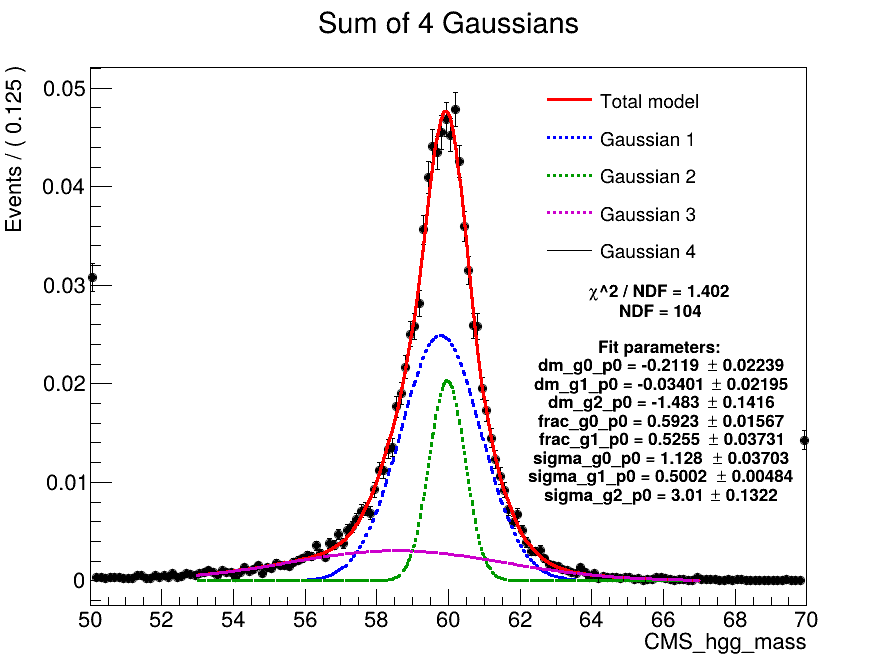

In [23]:
c = ROOT.TCanvas("c", "", 900, 700)

frame = xvar.frame()
PDF.plotOn(frame)

frame.Draw()
c.Draw()


[#1] INFO:InputArguments -- RooAbsData::plotOn(WHM60Y2018_60_13TeV_DiPho_pt_hist) INFO: dataset has non-integer weights, auto-selecting SumW2 errors instead of Poisson errors


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


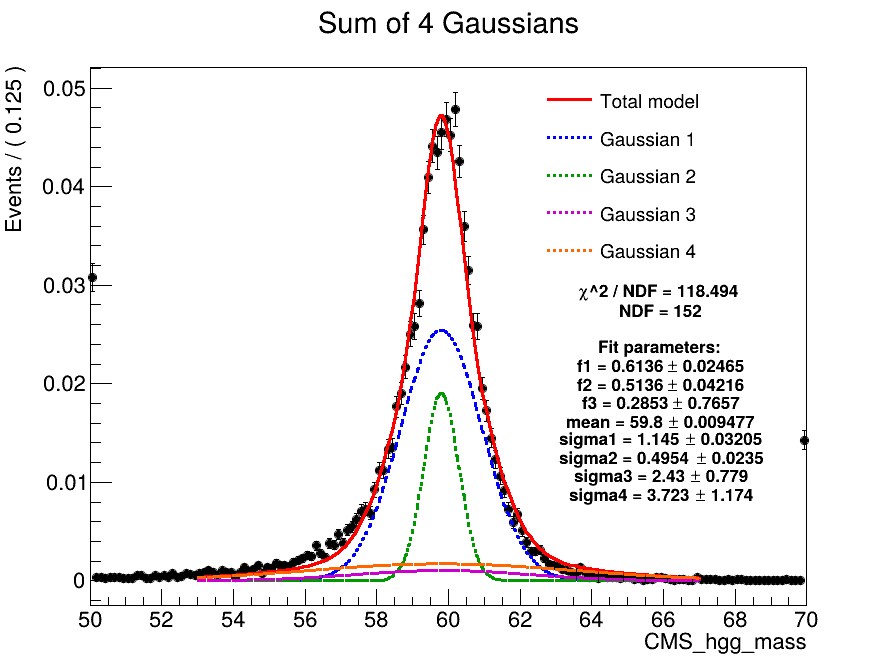

In [20]:

frame = xvar.frame(ROOT.RooFit.Title("RooDataHist plot"))


DataHists.plotOn(frame)

c = ROOT.TCanvas("c","DataHist",900,700)
frame.Draw()
c.Draw()

In [31]:
N_GAUSS = 4   # <-- change n here

frame = xvar.frame(ROOT.RooFit.Title(f"Sum of {N_GAUSS} Gaussians"))

mean = ROOT.RooRealVar("mean","mean",60.0,55.0,65.0)

fit_lo = 53.0
fit_hi = 67.0

xvar.setRange("fit", fit_lo, fit_hi)


# store references to avoid garbage collection
gauss_objs = []
sigma_vars = []
frac_vars  = []

gaussians = ROOT.RooArgList()
fractions = ROOT.RooArgList()

sigma_seeds = [1.2, 2.5, 4.0]

colors = [ROOT.kBlue, ROOT.kGreen+2, ROOT.kMagenta+1,
          ROOT.kOrange+7, ROOT.kCyan+2, ROOT.kViolet]


#-------------------------------------same mean -------------------------------------------------------------

for i in range(N_GAUSS):

    # --- sigma parameter ---
    s0 = sigma_seeds[min(i, len(sigma_seeds)-1)]
    sigma = ROOT.RooRealVar(f"sigma{i+1}", f"sigma{i+1}", s0, 0.1, 50.0)
    sigma_vars.append(sigma)

    # --- Gaussian component ---
    g = ROOT.RooGaussian(
        f"g{i+1}", f"Gaussian {i+1}",
        xvar, mean, sigma
    )

    gauss_objs.append(g)   # keep python ownership
    gaussians.add(g)

    # --- create fraction for all but last component ---
    if i < N_GAUSS - 1:
        f = ROOT.RooRealVar(
            f"f{i+1}", f"fraction {i+1}",
            max(0.05, 1.0/N_GAUSS), 0.0, 1.0
        )
        frac_vars.append(f)
        fractions.add(f)

#-----------------------------------variable means -------------------------------------------------------------

# for i in range(N_GAUSS):

#     mean_i = ROOT.RooRealVar(
#         f"mean{i+1}", f"mean{i+1}",
#         60.0, 59.0, 61.0
#     )

#     s0 = sigma_seeds[min(i, len(sigma_seeds)-1)]

#     sigma_i = ROOT.RooRealVar(
#         f"sigma{i+1}", f"sigma{i+1}",
#         s0, 0.1, 50.0
#     )

#     sigma_vars.append(sigma_i)

#     g = ROOT.RooGaussian(
#         f"g{i+1}", f"Gaussian {i+1}",
#         xvar, mean_i, sigma_i
#     )

#     gauss_objs.append(g)
#     gaussians.add(g)

#     if i < N_GAUSS-1:
#         f = ROOT.RooRealVar(
#             f"f{i+1}", f"fraction {i+1}",
#             max(0.05,1.0/N_GAUSS), 0.0, 1.0
#         )
#         frac_vars.append(f)
#         fractions.add(f)

#--------------------------------------------------------------------------------------------------------------------------


# RooFit constrains last fraction automatically
model = ROOT.RooAddPdf(
    "model", f"Sum of {N_GAUSS} Gaussians",
    gaussians,
    fractions,
    True  # recursiveFraction mode
)


# fit_result = model.fitTo(
#     DataHists,
#     ROOT.RooFit.Save(True),
#     ROOT.RooFit.SumW2Error(True),
#     ROOT.RooFit.PrintLevel(-1)
# )


# fit_result = model.fitTo(
#     DataHists,
#     ROOT.RooFit.Save(True),
#     ROOT.RooFit.SumW2Error(True),
#     ROOT.RooFit.Range("fit"),     # <-- HERE
#     ROOT.RooFit.PrintLevel(-1)
# )

#------------------------------------------------------Iterative fitting---------------------------------------------------------
# tolerance = 1e-3        # stop when minNLL improves less than this
# max_iters = 20          # safety cap

# prev_nll = None

# for it in range(1, max_iters+1):
#     print(f">>> Iteration {it}")

#     fit_result = model.fitTo(
#         DataHists,
#         ROOT.RooFit.Save(True),
#         ROOT.RooFit.Range("fit"),
#         ROOT.RooFit.SumW2Error(True),
#         ROOT.RooFit.PrintLevel(-1)
#     )

#     nll = fit_result.minNll()

#     # first iteration → just store NLL
#     if prev_nll is None:
#         prev_nll = nll
#         continue

#     improvement = prev_nll - nll
#     print(f"   Δ(minNLL) = {improvement:.4g}")

#     # stop if improvement is below tolerance
#     if improvement < tolerance:
#         print(">>> Converged — stopping iterative refinement")
#         break

#     prev_nll = nll
#------------------------------------------------------------------------------------------------------------------------------------

#--------------------------------------------Progressive unfreezing---------------------------------------------------------
# --- step 0: start with reasonable initial values ---
for s in sigma_vars:
    s.setConstant(False)

for f in frac_vars:
    f.setConstant(False)

# helper so we can freeze / unfreeze later
def freeze_all():
    for s in sigma_vars:
        s.setConstant(True)
    for f in frac_vars:
        f.setConstant(True)

# ------------------------------
# STEP 1 — fit first Gaussian only
# ------------------------------
freeze_all()
sigma_vars[0].setConstant(False)

print(">>> Fitting core Gaussian…")
model.fitTo(
    DataHists,
    ROOT.RooFit.Range("fit"),
    ROOT.RooFit.SumW2Error(True),
    ROOT.RooFit.PrintLevel(-1)
)

# ------------------------------
# STEP 2 — enable 2nd Gaussian
# ------------------------------
if N_GAUSS > 1:
    sigma_vars[1].setConstant(False)
    frac_vars[0].setConstant(False)

    print(">>> Refining with 2 Gaussians…")
    model.fitTo(
        DataHists,
        ROOT.RooFit.Range("fit"),
        ROOT.RooFit.SumW2Error(True),
        ROOT.RooFit.PrintLevel(-1)
    )

# ------------------------------
# STEP 3 — enable remaining Gaussians iteratively
# ------------------------------
for i in range(2, N_GAUSS):
    sigma_vars[i].setConstant(False)
    frac_vars[i-1].setConstant(False)

    print(f">>> Refining with {i+1} Gaussians…")
    model.fitTo(
        DataHists,
        ROOT.RooFit.Range("fit"),
        ROOT.RooFit.SumW2Error(True),
        ROOT.RooFit.PrintLevel(-1)
    )

print(">>> Final global fit (all parameters floating)")
fit_result = model.fitTo(
    DataHists,
    ROOT.RooFit.Save(True),
    ROOT.RooFit.Range("fit"),
    ROOT.RooFit.SumW2Error(True),
    ROOT.RooFit.PrintLevel(-1)
)

#--------------------------------------------------------------------------------------------------------------------------------


nParams = fit_result.floatParsFinal().getSize()


fit_result.Print()

params_text = []
pars = fit_result.floatParsFinal()

for i in range(pars.getSize()):
    p = pars.at(i)
    params_text.append(
        f"{p.GetName()} = {p.getVal():.4g}#pm {p.getError():.4g}"
    )


#----------------------------------
# Draw data
#----------------------------------
DataHists.plotOn(frame)

model.plotOn(
    frame,
    ROOT.RooFit.LineColor(ROOT.kRed),
    ROOT.RooFit.Name("model_total"),
    ROOT.RooFit.Range("fit")     # <-- THIS
)

# (optional) dashed tails still fine
for i in range(N_GAUSS):
    model.plotOn(
        frame,
        ROOT.RooFit.Components(f"g{i+1}"),
        ROOT.RooFit.LineStyle(ROOT.kDashed),
        ROOT.RooFit.LineColor(colors[i % len(colors)]),
        ROOT.RooFit.Range("fit"),
        ROOT.RooFit.Name(f"g{i+1}_curve")
    )


#----------------------------------
# Now create canvas + draw frame
#----------------------------------
c = ROOT.TCanvas("c", f"{N_GAUSS}G Fit", 900, 700)
frame.Draw()

data_hist_name = None
curve_name = None

n_items = int(frame.numItems())   # <-- force integer

for i in range(n_items):
    obj = frame.getObject(int(i))   # also force int here
    name = obj.GetName()

    # first RooHist encountered = data
    if obj.InheritsFrom("RooHist") and data_hist_name is None:
        data_hist_name = name

    # last RooCurve encountered = model curve
    if obj.InheritsFrom("RooCurve"):
        curve_name = name

print("Data hist:", data_hist_name)
print("Model curve:", curve_name)

nParams = fit_result.floatParsFinal().getSize()

chi2 = frame.chiSquare(
    curve_name,
    data_hist_name,
    nParams
)

# ndf = int(frame.GetNbinsX()) - nParams

roo_hist = frame.findObject(data_hist_name)

# Number of histogram points actually plotted
N_used = roo_hist.GetN()

# nParams = fit_result.floatParsFinal().getSize()

ndf = N_used - nParams

print(f"χ²       = {chi2 * ndf}")
print(f"NDF      = {ndf}")
print(f"χ² / NDF = {chi2}")



#----------------------------------
# Build legend from drawn objects
#----------------------------------
legend = ROOT.TLegend(0.60, 0.60, 0.88, 0.88)
legend.SetBorderSize(0)
legend.SetFillStyle(0)
legend.SetTextSize(0.030)

legend.AddEntry(frame.findObject("model_total"),
                "Total model", "l")

for i in range(N_GAUSS):
    legend.AddEntry(
        frame.findObject(f"g{i+1}_curve"),
        f"Gaussian {i+1}",
        "l"
    )

legend.Draw()

info = ROOT.TPaveText(0.60, 0.25, 0.88, 0.58, "NDC")
info.SetFillStyle(0)
info.SetBorderSize(0)
info.SetTextSize(0.028)

info.AddText(f"#chi^2 / NDF = {chi2:.3f}")
info.AddText(f"NDF = {ndf}")

info.AddText("")
info.AddText("Fit parameters:")

for t in params_text:
    info.AddText(t)

info.Draw()

c.Update()

c.SaveAs(f"Manual_GaussFit_{N_GAUSS}G.png")

>>> Fitting core Gaussian…
>>> Refining with 2 Gaussians…
>>> Refining with 3 Gaussians…
>>> Refining with 4 Gaussians…
>>> Final global fit (all parameters floating)
Data hist: h_WHM60Y2018_60_13TeV_DiPho_pt_hist
Model curve: g4_curve
χ²       = 18011.05358465786
NDF      = 152
χ² / NDF = 118.4937735832754
[#1] INFO:Fitting -- RooAbsPdf::fitTo(model) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_WHM60Y2018_60_13TeV_DiPho_pt_hist) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsPdf::fitTo(model) Calculating sum-of-weights-squared correction matrix for covariance matrix
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization
[#1] INFO:Fitting -- RooAbsPdf::fitTo(model) fixing normalization set for coefficient determination to obse

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file Manual_GaussFit_4G.png has been created


In [ ]:
N_GAUSS = 4   # <-- change n here

frame = xvar.frame(ROOT.RooFit.Title(f"Sum of {N_GAUSS} Gaussians"))

mean = ROOT.RooRealVar("mean","mean",60.0,55.0,65.0)

fit_lo = 53.0
fit_hi = 67.0

xvar.setRange("fit", fit_lo, fit_hi)

colors = [ROOT.kBlue, ROOT.kGreen+2, ROOT.kMagenta+1,
          ROOT.kOrange+7, ROOT.kCyan+2, ROOT.kViolet]



print(">>> Final global fit (all parameters floating)")
fit_result = PDF.fitTo(
    DataHists,
    ROOT.RooFit.Save(True),
    ROOT.RooFit.Range("fit"),
    ROOT.RooFit.SumW2Error(True),
    ROOT.RooFit.PrintLevel(-1)
)

#--------------------------------------------------------------------------------------------------------------------------------


nParams = fit_result.floatParsFinal().getSize()


fit_result.Print()

params_text = []
pars = fit_result.floatParsFinal()

for i in range(pars.getSize()):
    p = pars.at(i)
    params_text.append(
        f"{p.GetName()} = {p.getVal():.4g}#pm {p.getError():.4g}"
    )


#----------------------------------
# Draw data
#----------------------------------
DataHists.plotOn(frame)

PDF.plotOn(
    frame,
    ROOT.RooFit.LineColor(ROOT.kRed),
    ROOT.RooFit.Name("model_total"),
    ROOT.RooFit.Range("fit")     # <-- THIS
)

for i in range(N_GAUSS):
    PDF.plotOn(
        frame,
        ROOT.RooFit.Components(f"gaus_g{i}"),
        ROOT.RooFit.LineStyle(ROOT.kDashed),
        ROOT.RooFit.LineColor(colors[i % len(colors)]),
        ROOT.RooFit.Range("fit"),
        ROOT.RooFit.Name(f"gaus_g{i}_curve")
    )



#----------------------------------
# Now create canvas + draw frame
#----------------------------------
c = ROOT.TCanvas("c", f"{N_GAUSS}G Fit", 900, 700)
frame.Draw()

data_hist_name = None
curve_name = "model_total"

n_items = int(frame.numItems())   # <-- force integer

for i in range(n_items):
    obj = frame.getObject(int(i))   # also force int here
    name = obj.GetName()

    # first RooHist encountered = data
    if obj.InheritsFrom("RooHist") and data_hist_name is None:
        data_hist_name = name

#     # last RooCurve encountered = model curve
#     if obj.InheritsFrom("RooCurve"):
#         curve_name = name

print("Data hist:", data_hist_name)
print("Model curve:", curve_name)

nParams = fit_result.floatParsFinal().getSize()

chi2 = frame.chiSquare(
    curve_name,
    data_hist_name,
    nParams
)

# # ndf = int(frame.GetNbinsX()) - nParams

roo_hist = frame.findObject(data_hist_name)

# # Number of histogram points actually plotted
# N_used = roo_hist.GetN()

# # nParams = fit_result.floatParsFinal().getSize()

fit_min, fit_max = fit_lo, fit_hi

fit_min, fit_max = fit_lo, fit_hi

N_used = 0

for i in range(roo_hist.GetN()):
    x = roo_hist.GetX()[i]
    if x >= fit_min and x <= fit_max:
        N_used += 1

ndf = N_used - nParams

print(f"χ²       = {chi2 * ndf}")
print(f"NDF      = {ndf}")
print(f"χ² / NDF = {chi2}")



#----------------------------------
# Build legend from drawn objects
#----------------------------------
legend = ROOT.TLegend(0.60, 0.60, 0.88, 0.88)
legend.SetBorderSize(0)
legend.SetFillStyle(0)
legend.SetTextSize(0.030)

legend.AddEntry(frame.findObject("model_total"),
                "Total model", "l")

for i in range(N_GAUSS):
    legend.AddEntry(
        frame.findObject(f"gaus_g{i}_curve"),
        f"Gaussian {i+1}",
        "l"
    )


legend.Draw()

info = ROOT.TPaveText(0.60, 0.25, 0.88, 0.58, "NDC")
info.SetFillStyle(0)
info.SetBorderSize(0)
info.SetTextSize(0.028)

info.AddText(f"#chi^2 / NDF = {chi2:.3f}")
info.AddText(f"NDF = {ndf}")

info.AddText("")
info.AddText("Fit parameters:")

for t in params_text:
    info.AddText(t)

info.Draw()

c.Update()

c.SaveAs(f"Manual_GaussFit_{N_GAUSS}G.png")

>>> Final global fit (all parameters floating)
Data hist: h_WHM60Y2018_60_13TeV_DiPho_pt_hist
Model curve: model_total
χ²       = 145.85409150744465
NDF      = 104
χ² / NDF = 1.4024431875715833
[#1] INFO:Fitting -- RooAbsPdf::fitTo(WHM60Y2018_DiPho_pt) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_WHM60Y2018_DiPho_pt_WHM60Y2018_60_13TeV_DiPho_pt_hist) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Fitting -- RooAbsPdf::fitTo(WHM60Y2018_DiPho_pt) Calculating sum-of-weights-squared correction matrix for covariance matrix
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization

  RooFitResult: minimized FCN value: 1.6508, estimated distance to minimum: 7.18258e-09
                covariance matrix quality: Full, accurate covariance matrix
               

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file Manual_GaussFit_4G.png has been created


In [23]:
print(type(DataHists))

<class cppyy.gbl.RooDataHist at 0x5644e3f761a0>


In [24]:
print(type(frame))

<class 'CPyCppyy_NoneType'>


In [33]:
print("xvar:", xvar, type(xvar))
xvar.Print()

xvar: RooRealVar::CMS_hgg_mass = 60.2134  L(50 - 70) B(15) 
 <class cppyy.gbl.RooRealVar at 0x5644e337d480>
RooRealVar::CMS_hgg_mass = 60.2134  L(50 - 70) B(15) 


In [150]:
DataHists.get(3)

In [46]:
# ROOT.RooAbsData.SumW2

In [47]:
file = '/eos/user/b/bbapi/My_Analysis/NTuples_bbgg/dr_ele_pho/root/WHM60-RunIISummer20UL18NanoAODv2/output_WHM60Y2018_M60_13TeV_amcatnlo_pythia8.root'
f_root = ROOT.TFile.Open(file)

Error in <TNetXNGFile::Open>: [ERROR] Server responded with an error: [3010] Unable to give access - user access restricted - unauthorized identity used ; Permission denied



In [48]:
f_root.ls()

TFile**		/eos/user/b/bbapi/My_Analysis/NTuples_bbgg/dr_ele_pho/root/WHM60-RunIISummer20UL18NanoAODv2/output_WHM60Y2018_M60_13TeV_amcatnlo_pythia8.root	
 TFile*		/eos/user/b/bbapi/My_Analysis/NTuples_bbgg/dr_ele_pho/root/WHM60-RunIISummer20UL18NanoAODv2/output_WHM60Y2018_M60_13TeV_amcatnlo_pythia8.root	
  KEY: TDirectoryFile	DiphotonTree;1	DiphotonTree


In [49]:
dipho_dir = f_root.Get("DiPhotonTree")

In [50]:
print(f_root.IsOpen())
print(f_root.GetName())

True
/eos/user/b/bbapi/My_Analysis/NTuples_bbgg/dr_ele_pho/root/WHM60-RunIISummer20UL18NanoAODv2/output_WHM60Y2018_M60_13TeV_amcatnlo_pythia8.root


In [51]:
keys = f_root.GetListOfKeys()
for k in keys:
    if k.GetName() == "DiphotonTree":
        dipho_dir = k.ReadObj()
        break

print(type(dipho_dir))
dipho_dir.ls()


<class cppyy.gbl.TDirectoryFile at 0x55ab2e94cab0>
TDirectoryFile*		DiphotonTree	DiphotonTree
 KEY: TTree	WHM60Y2018_60_13TeV_DiPho_pt;1	


In [52]:
tree = dipho_dir.Get("WHM60Y2018_60_13TeV_DiPho_pt")
tree.Print()

******************************************************************************
*Tree    :WHM60Y2018_60_13TeV_DiPho_pt:                                                        *
*Entries :    15693 : Total =        20565868 bytes  File  Size =    8476556 *
*        :          : Tree compression factor =   2.46                       *
******************************************************************************
*Br    0 :pholead_seediEtaOriX : pholead_seediEtaOriX/B                      *
*Entries :    15693 : Total  Size=      16676 bytes  File Size  =      15211 *
*Baskets :        4 : Basket Size=      32000 bytes  Compression=   1.06     *
*............................................................................*
*Br    1 :pholead_cutBased : pholead_cutBased/b                              *
*Entries :    15693 : Total  Size=      16644 bytes  File Size  =       5603 *
*Baskets :        4 : Basket Size=      32000 bytes  Compression=   2.88     *
*.................................

In [53]:
for i, entry in enumerate(tree):
    print(getattr(entry, "weight"))
    if i == 10:
        break

1.0121457489878542e-06
1.0121457489878542e-06
1.0121457489878542e-06
1.0121457489878542e-06
1.0121457489878542e-06
1.0121457489878542e-06
1.0121457489878542e-06
1.0121457489878542e-06
1.0121457489878542e-06
1.0121457489878542e-06
1.0121457489878542e-06


In [54]:
import awkward as ak
parquet = ak.from_parquet('/eos/user/b/bbapi/My_Analysis/NTuples_bbgg/dr_ele_pho/merged/WHM60-RunIISummer20UL18NanoAODv2/DiPho_pt_merged.parquet')

In [55]:
parquet.weight

<Array [1.01e-06, 1.01e-06, ..., 1.01e-06, 1.01e-06] type='15693 * ?float64'>

In [56]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak

file = '/eos/user/b/bbapi/CMSSW_13_3_1_patch1/src/NanoAODProduction/NanoAODv13/test/M60-RunIISummer20UL18NanoAODv2/C5668E37-521E-CB4B-9C7F-4765172B5EAF.root'
factory = NanoEventsFactory.from_root(
    f"{file}:Events",
    schemaclass=NanoAODSchema,
)
events = factory.events()

events = ak.materialize(events)

In [57]:
events.fields

['LHE',
 'genTtbarId',
 'SoftActivityJet',
 'LowPtElectron',
 'run',
 'Muon',
 'DeepMETResolutionTune',
 'LHEWeight',
 'TkMET',
 'ScoutingCaloMuonOutput',
 'LHEScaleWeight',
 'L1Reco',
 'HTXS',
 'SoftActivityJetNjets5',
 'GenPart',
 'SubJet',
 'SoftActivityJetHT10',
 'SoftActivityJetHT5',
 'ScoutingPFOutput',
 'ChsMET',
 'boostedTau',
 'CorrT1METJet',
 'bunchCrossing',
 'L1',
 'TrigObj',
 'TauProd',
 'LHEPart',
 'GenProton',
 'PV',
 'Flag',
 'GenJetAK8',
 'OtherPV',
 'Electron',
 'GenDressedLepton',
 'FsrPhoton',
 'DST',
 'IsoTrack',
 'SoftActivityJetNjets10',
 'L1PreFiringWeight',
 'HLTriggerFinalPath',
 'GenVtx',
 'L1simulation',
 'DeepMETResponseTune',
 'event',
 'RawPuppiMET',
 'GenJet',
 'LHEReweightingWeight',
 'luminosityBlock',
 'SubGenJetAK8',
 'HLT',
 'LHEPdfWeight',
 'Jet',
 'GenVisTau',
 'SoftActivityJetHT',
 'RawMET',
 'FatJet',
 'genWeight',
 'SV',
 'BeamSpot',
 'SoftActivityJetNjets2',
 'Pileup',
 'CaloMET',
 'GenIsolatedPhoton',
 'HLTriggerFirstPath',
 'Tau',
 'MET',
 '

In [58]:
events.genWeight

<Array [1, 1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1] type='45000 * float32[paramet...'>

In [3]:
!cd /eos/user/b/bbapi/flashggNew/CMSSW_14_1_0_pre4/src/flashggFinalFit/
!source /eos/user/b/bbapi/flashggNew/CMSSW_14_1_0_pre4/src/flashggFinalFit/setup.sh

SCRAM fatal: Unable to locate the top of local release. Please run this command from a SCRAM-based area.


In [1]:
import ROOT
ROOT.gSystem.Load("libHiggsAnalysisCombinedLimit")

Error in <TUnixSystem::FindDynamicLibrary>: libHiggsAnalysisCombinedLimit[.so | .dll | .dylib | .sl | .dl | .a] does not exist in /usr/local/cuda-13.0/lib64:/usr/local/cuda-13.0/lib64:.:/eos/home-b/bbapi/HiggsDNA/micromamba_dir/envs/higgs-dna/lib:/lib64/glibc-hwcaps/x86-64-v4:/lib64/glibc-hwcaps/x86-64-v3:/lib64/glibc-hwcaps/x86-64-v2:/lib64/tls/haswell/avx512_1/x86_64:/lib64/tls/haswell/avx512_1:/lib64/tls/haswell/x86_64:/lib64/tls/haswell:/lib64/tls/avx512_1/x86_64:/lib64/tls/avx512_1:/lib64/tls/x86_64:/lib64/tls:/lib64/haswell/avx512_1/x86_64:/lib64/haswell/avx512_1:/lib64/haswell/x86_64:/lib64/haswell:/lib64/avx512_1/x86_64:/lib64/avx512_1:/lib64/x86_64:/lib64:/usr/lib64/glibc-hwcaps/x86-64-v4:/usr/lib64/glibc-hwcaps/x86-64-v3:/usr/lib64/glibc-hwcaps/x86-64-v2:/usr/lib64/tls/haswell/avx512_1/x86_64:/usr/lib64/tls/haswell/avx512_1:/usr/lib64/tls/haswell/x86_64:/usr/lib64/tls/haswell:/usr/lib64/tls/avx512_1/x86_64:/usr/lib64/tls/avx512_1:/usr/lib64/tls/x86_64:/usr/lib64/tls:/usr/lib6

-1

In [4]:
dir_fm = '/eos/home-b/bbapi/flashggNew/CMSSW_14_1_0_pre4/src/flashggFinalFit/Signal/outdir_dcb_2018/signalFit/output/CMS-HGG_sigfit_dcb_2018_WHM60Y2018_2018_DiPho_pt.root'

In [5]:
file = ROOT.TFile.Open(dir_fm)

NameError: name 'ROOT' is not defined

In [4]:
file.ls()

TFile**		/eos/home-b/bbapi/flashggNew/CMSSW_14_1_0_pre4/src/flashggFinalFit/Signal/outdir_dcb_2018/signalFit/output/CMS-HGG_sigfit_dcb_2018_WHM60Y2018_2018_DiPho_pt.root	
 TFile*		/eos/home-b/bbapi/flashggNew/CMSSW_14_1_0_pre4/src/flashggFinalFit/Signal/outdir_dcb_2018/signalFit/output/CMS-HGG_sigfit_dcb_2018_WHM60Y2018_2018_DiPho_pt.root	
  KEY: RooWorkspace	wsig_13TeV;1	wsig_13TeV
  KEY: TProcessID	ProcessID0;1	e11fa8c8-e637-11f0-88cf-f8c3b8bcbeef


In [5]:
w_fm = file.Get("wsig_13TeV")
w_fm.ls()

: 

In [36]:
ws_fm = w_fm.Get("cms_hgg_13TeV")
ws_fm.Print('v')


RooWorkspace(cms_hgg_13TeV) cms_hgg_13TeV contents

variables
---------
(CMS_hgg_mass,dZ,intLumi,weight,weight_central,weight_nominal)

datasets
--------
RooDataSet::WHM60Y2018_60_13TeV_DiPho_pt(CMS_hgg_mass,dZ,weight_central,weight_nominal)



In [37]:
dataset_fm = ws_fm.data("WHM60Y2018_60_13TeV_DiPho_pt")

In [38]:
dataset_fm.numEntries()

15693

In [39]:
dataset_fm.Print("v")

DataStore WHM60Y2018_60_13TeV_DiPho_pt (WHM60Y2018_60_13TeV_DiPho_pt)
  Contains 15693 entries
  Observables: 
    1)    CMS_hgg_mass = 60.2134  L(50 - 70) B(160)  "CMS_hgg_mass"
    2)              dZ = 0.0026474  L(-20 - 20) B(40)  "dZ"
    3)  weight_central = 1  L(-999999 - 999999) B(1)  "weight_central"
    4)  weight_nominal = 1  L(-999999 - 999999) B(1)  "weight_nominal"
  Dataset variable "weight" is interpreted as the event weight
